In [86]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))\

import pandas as pd
import numpy as np
import GPy
import seaborn as sns
    
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
np.linspace(0,10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [65]:
max_p=2
min_p=0
period = np.array([max_p]*5+[min_p]*2)
reps=6
Y=np.tile(period,reps)
data_len=len(Y)
lin=np.linspace(0,2*len(Y)-1,data_len)
Y=Y+lin
noise = np.random.normal(0,1,data_len)
Y=Y+noise
Y_noperiod=(lin+noise).reshape(-1,1)
Y=Y.reshape(-1,1)
X = np.linspace(0, data_len-1, data_len).reshape(-1, 1)
#Y

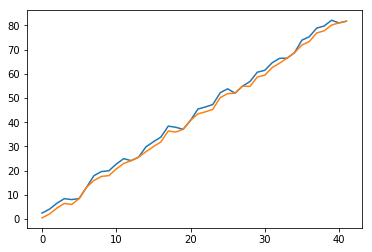

In [66]:
plt.plot(X,Y)
plt.plot(X,Y_noperiod)

### Why does adding the bias here make it predict so much better when having no noise?

GP_regression.,value,constraints,priors
sum.periodic_Matern52.variance,7.164034107755192,+ve,
sum.periodic_Matern52.lengthscale,1.4994190913289533,+ve,
sum.periodic_Matern52.period,7.1241403662336795,+ve,
sum.linear.variances,4.321150950074316,+ve,
Gaussian_noise.variance,1.426011781348926,+ve,


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


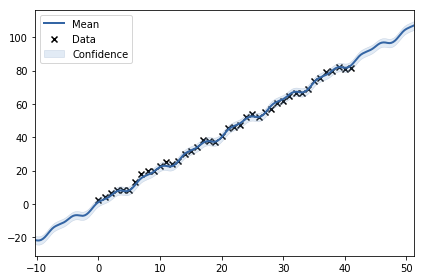

In [67]:
PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)
LIN=GPy.kern.Linear(1)

m = GPy.models.GPRegression(X, Y, MATERN+LIN)
m.optimize()
display(m)

m.plot()

GP_regression.,value,constraints,priors
sum.periodic_Matern52.variance,0.5146739597424544,+ve,
sum.periodic_Matern52.lengthscale,0.9171511174740951,+ve,
sum.periodic_Matern52.period,7.25989464812283,+ve,
sum.linear.variances,4.109196565004746,+ve,
Gaussian_noise.variance,0.8788198254690003,+ve,


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


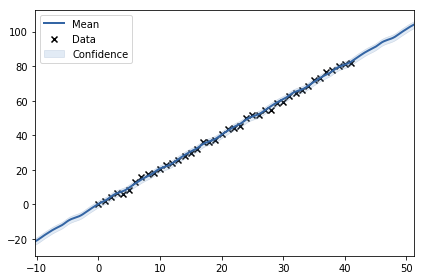

In [68]:
PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)
LIN=GPy.kern.Linear(1)

m = GPy.models.GPRegression(X, Y_noperiod, MATERN+LIN)
m.optimize()
display(m)

m.plot()

In [ ]:
# larger log likelihood better?

In [53]:
reps=6
data_len=reps*7
X = np.linspace(0, data_len-1, data_len).reshape(-1, 1)

In [54]:
max_p=2
min_p=0
period = np.array([max_p]*5+[min_p]*2)
p_arr=np.tile(period,reps)

In [126]:
mp

GP_regression.,value,constraints,priors
sum.periodic_Matern52.variance,5.366252619968952,+ve,
sum.periodic_Matern52.lengthscale,0.02772015554880607,+ve,
sum.periodic_Matern52.period,7.00000000001526,+ve,
sum.linear.variances,0.9952940884271365,+ve,
sum.bias.variance,2.088884354852656,+ve,
Gaussian_noise.variance,2.0220239560130946e-10,+ve,


In [125]:
mp.param_array

array([5.36625262e+00, 2.77201555e-02, 7.00000000e+00, 9.95294088e-01,
       2.08888435e+00, 2.02202396e-10])

 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


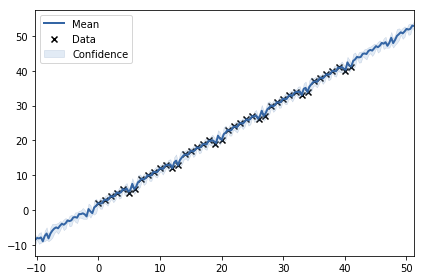

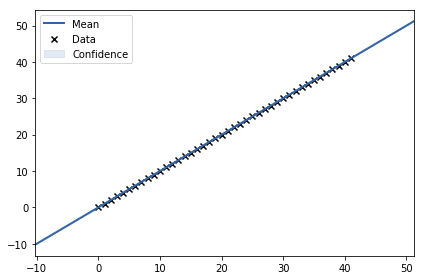

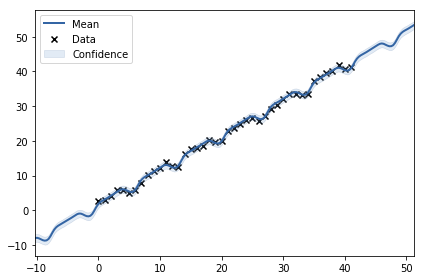

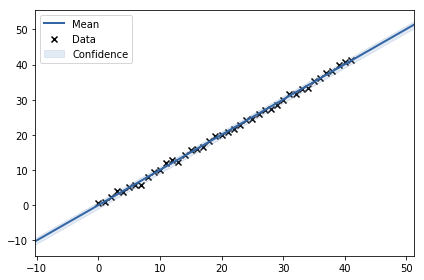

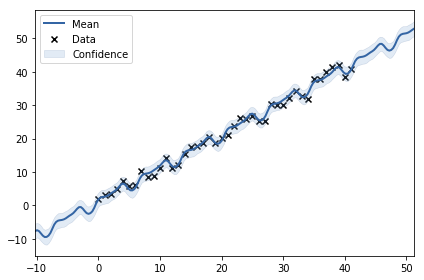

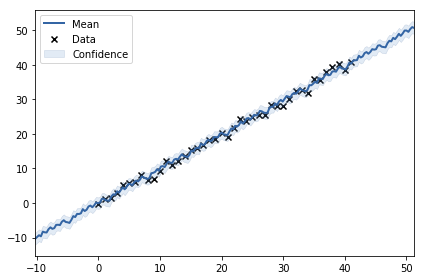

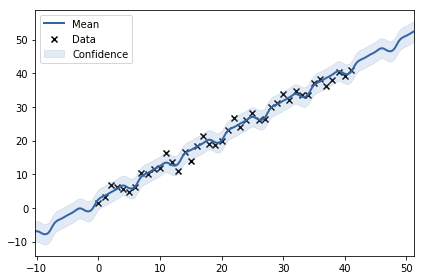

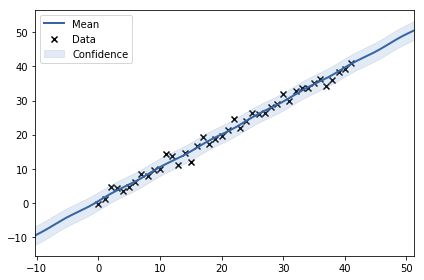

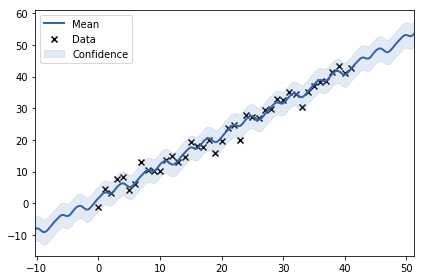

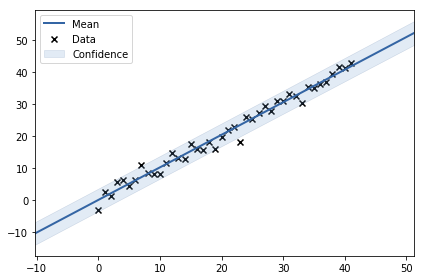

In [135]:
df=pd.DataFrame(columns=['pv','pl','pp','lv','bv','gn','ll','per'],index=range(50))
i=0
rows_list=[]
for lin_a in range(1,2):
    for noise_v in np.linspace(0,2,5):
        #print(noise_v)
        lin=np.linspace(0,lin_a*len(Y)-1,data_len)
        noise = np.random.normal(0,noise_v,data_len)
        Yp=p_arr+lin+noise
        Ylin=lin+noise
        Yp=Yp.reshape(-1,1)
        Ylin=Ylin.reshape(-1,1)
        mp = GPy.models.GPRegression(X, Yp, MATERN+LIN+BIAS)
        mp.optimize()
        mp.plot()
        df.loc[i][:'gn']=mp.param_array
        df.loc[i]['ll']=mp.log_likelihood()
        df.loc[i]['per']=True
        i+=1
        ml = GPy.models.GPRegression(X, Ylin, MATERN+LIN+BIAS)
        ml.optimize()
        ml.plot()
        df.loc[i][:'gn']=ml.param_array
        df.loc[i]['ll']=ml.log_likelihood()
        df.loc[i]['per']=False
        i+=1
        
        

In [136]:
df=df.dropna()
df

,pv,pl,pp,lv,bv,gn,ll,per
0,5.36625,0.0277202,7,0.995294,2.08888,2.02202e-10,258.36,True
1,1.69477e-16,66.8006,6.05435,0.999995,6.76696e-25,5.56268e-309,333.49,False
2,3.53482,1.44105,7.00363,0.999435,2.26553,0.242376,-45.9445,True
3,8.66879e-05,18.0858,5.75313,1.00395,2.45931e-09,0.239215,-35.3124,False
4,4.39135,0.954915,6.97492,1.00143,1.49008,0.915424,-71.2121,True
5,0.911652,0.175931,6.40376,0.96529,5.12266e-09,0.591099,-61.7601,False
6,2.97829,1.04625,7.00009,0.941156,4.81856,1.87359,-83.1389,True
7,8.96884,7.69175,7.77966,0.952239,0.438457,1.65812,-76.0288,False
8,3.19354,0.789675,6.96193,1.04298,2.04688,3.19551,-93.1279,True
9,0.000344444,13.2396,0.0455728,1.03732,1.11014e-07,3.24152,-88.7615,False


In [138]:
df['pv']=df['pv'].apply(pd.to_numeric)
df['pl']=df['pl'].apply(pd.to_numeric)

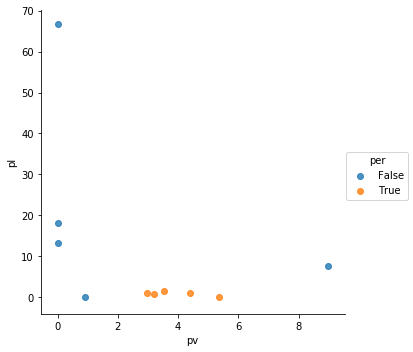

In [140]:
#plotting in log-scale with seaborn was horrible, so this was easiest way to do it
df['pv_log']=np.log(df['pv'])
grid=sns.lmplot(x='pv',y='pl',data=df,fit_reg=False,hue='per')